In [1]:
%matplotlib inline

import gym
import matplotlib
import numpy as np
import sys

from collections import defaultdict

if "../" not in sys.path:
    sys.path.append("../") 
from lib.envs.blackjack import BlackjackEnv
from lib import plotting

matplotlib.style.use('ggplot')

In [2]:
env = BlackjackEnv()

In [12]:
from tqdm import tqdm

def mc_prediction(policy, env, num_episodes, discount_factor=1.0):
    """
    Monte Carlo prediction algorithm. Calculates the value function
    for a given policy using sampling.
    
    Args:
        policy: A function that maps an observation to action probabilities.
        env: OpenAI gym environment.
        num_episodes: Number of episodes to sample.
        discount_factor: Gamma discount factor.
    
    Returns:
        A dictionary that maps from state -> value.
        The state is a tuple and the value is a float.
    """

    # Keeps track of sum and count of returns for each state
    # to calculate an average. We could use an array to save all
    # returns (like in the book) but that's memory inefficient.
    returns_sum = defaultdict(float)
    returns_count = defaultdict(float)
    
    # The final value function
    V = defaultdict(float)

    for epoch in tqdm(range(num_episodes)):
        s = env.reset()
        seen_s = set()
        while True:
            a = sample_policy(s)
            next_s, reward, done, _ = env.step(a)

            if s not in seen_s:
                seen_s.add(s)
                returns_count[s] += 1

            for k in seen_s:
                returns_sum[k] = returns_sum[k]*discount_factor + reward

            if done:
                break
            s = next_s
            
    for s in returns_sum:
        V[s] = returns_sum[s] / returns_count[s]

    return V    

In [13]:
def sample_policy(observation):
    """
    A policy that sticks if the player score is > 20 and hits otherwise.
    """
    score, dealer_score, usable_ace = observation
    return 0 if score >= 20 else 1

100%|██████████| 10000/10000 [00:01<00:00, 6443.45it/s]


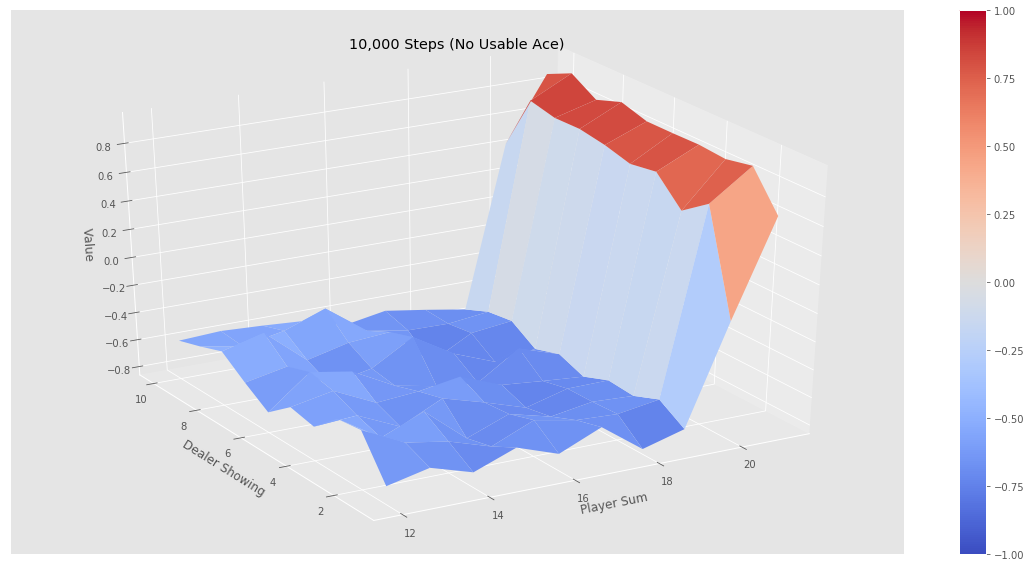

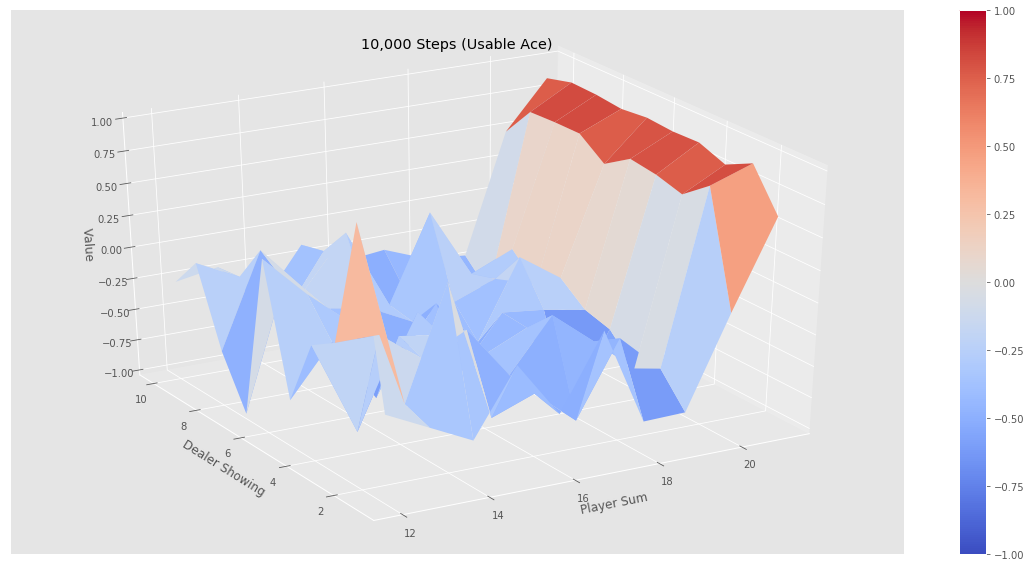

100%|██████████| 500000/500000 [01:19<00:00, 6278.61it/s]


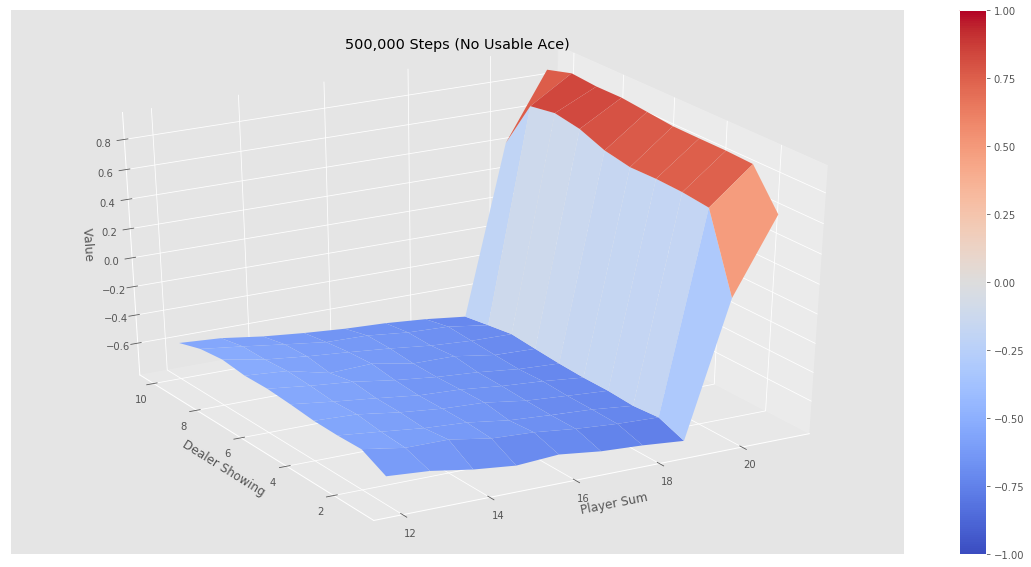

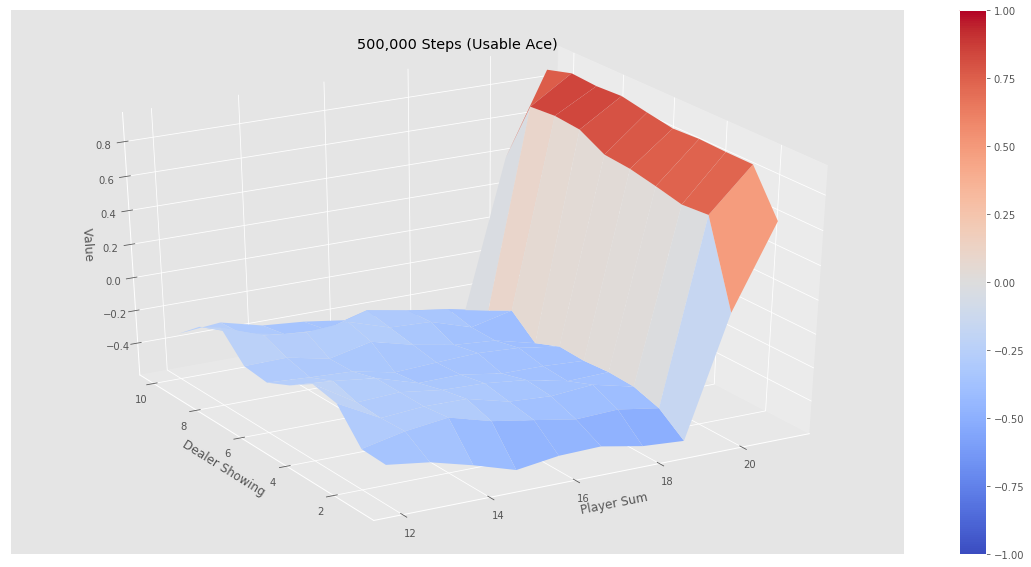

In [14]:
V_10k = mc_prediction(sample_policy, env, num_episodes=10000)
plotting.plot_value_function(V_10k, title="10,000 Steps")

V_500k = mc_prediction(sample_policy, env, num_episodes=500000)
plotting.plot_value_function(V_500k, title="500,000 Steps")